In [215]:
import pandas as pd
import numpy as np
sales_data=pd.read_csv('sales_train.csv')
item_cat=pd.read_csv('item_categories.csv')
items=pd.read_csv('items.csv')
shops=pd.read_csv('shops.csv')
sample_submission=pd.read_csv('sample_submission.csv')
test_data=pd.read_csv('test.csv')

In [90]:
def basic_eda(df):
    print('-----------Top 5 Records-----------')
    print(df.head(5))
    print('-----------INFO------------')
    print(df.info())
    print('-----------Describe-----------')
    print(df.describe())
    print('--------Columns-------------')
    print(df.columns)
    print('-----------Data Types---------')
    print(df.dtypes)
    print('-------Missing Values------')
    print(df.isnull().sum())
    print('---------NULL Values--------')
    print(df.isna().sum())
    print('-------Shape of Data--------')
    print(df.shape)

In [92]:
print('---------------Sales Data---------------')
basic_eda(sales_data)
print('------------Test Data--------------')
basic_eda(test)

---------------Sales Data---------------
-----------Top 5 Records-----------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
-----------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----------Describe-----------
       

In [217]:
dataset=sales_data.pivot_table(index=['shop_id','item_id'],values=['item_cnt_day'],columns=['date_block_num'],fill_value=0,aggfunc='sum')


In [218]:
dataset.reset_index(inplace=True)

In [219]:
dataset.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [220]:
dataset=pd.merge(test_data,dataset,on=['item_id','shop_id'],how='left')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [221]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
dataset.fillna(0,inplace=True)
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
dataset.drop(['shop_id','item_id','ID'],axis=1,inplace=True)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
X_train=np.expand_dims(dataset.values[:,:-1],axis=2)

In [225]:
y_train=dataset.values[:,-1:]

In [263]:
X_train[34]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [227]:
X_test=np.expand_dims(dataset.values[:,1:],axis = 2)

In [228]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.layers import Dense,Dropout,LSTM,RepeatVector,TimeDistributed,Flatten


In [264]:
model_lstm=tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=64,input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.add(tf.keras.layers.Dropout(0.4))
model_lstm.add(tf.keras.layers.Dense(1))

model_lstm.compile(loss='mse',optimizer='SGD',metrics=['mean_squared_error'])
model_lstm.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [265]:
history_lstm=model_lstm.fit(X_train,y_train,batch_size=4096,epochs=20)

Epoch 1/20
214200/214200 [==============================] - 51s 238us/sample - loss: 30.7212 - mean_squared_error: 30.7212
Epoch 2/20
214200/214200 [==============================] - 48s 226us/sample - loss: 30.4741 - mean_squared_error: 30.4741
Epoch 3/20
214200/214200 [==============================] - 48s 225us/sample - loss: 30.3535 - mean_squared_error: 30.3535
Epoch 4/20
214200/214200 [==============================] - 51s 237us/sample - loss: 30.2996 - mean_squared_error: 30.2996
Epoch 5/20
214200/214200 [==============================] - 51s 239us/sample - loss: 30.1970 - mean_squared_error: 30.1970
Epoch 6/20
214200/214200 [==============================] - 50s 235us/sample - loss: 30.0962 - mean_squared_error: 30.0962
Epoch 7/20
214200/214200 [==============================] - 50s 234us/sample - loss: 30.0498 - mean_squared_error: 30.0498
Epoch 8/20
214200/214200 [==============================] - 51s 237us/sample - loss: 30.0954 - mean_squared_error: 30.0954
Epoch 9/20
21420

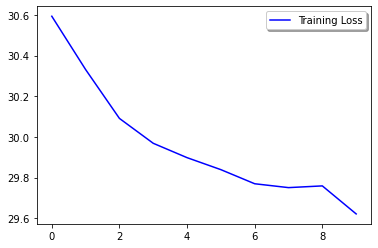

In [231]:
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'],color='b',label="Training Loss")
plt.legend(loc='best',shadow=True)

In [232]:
submission_pfs=model_lstm.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('final_submission.csv',index=False)

In [233]:
final=pd.read_csv('final_submission.csv')
final.head()

,ID,item_cnt_month
0,0,0.401259
1,1,0.139119
2,2,0.789510
3,3,0.176363
4,4,0.139119


In [234]:
#2nd model Multilayer Perceptron
adam=optimizers.Adam()

model_mlp=tf.keras.Sequential()
model_mlp.add(tf.keras.layers.Dense(100,activation='relu',input_dim=X_train.shape[1]))
model_mlp.add(tf.keras.layers.Dropout(0.4))
model_mlp.add(tf.keras.layers.Dense(1))

model_mlp.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])
model_mlp.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               3400      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [235]:
history_mlp=model_lstm.fit(X_train,y_train,batch_size=4096,epochs=10)

Epoch 1/10
214200/214200 [==============================] - 29s 137us/sample - loss: 29.6236 - mean_squared_error: 29.6236
Epoch 2/10
214200/214200 [==============================] - 35s 162us/sample - loss: 29.5546 - mean_squared_error: 29.5546
Epoch 3/10
214200/214200 [==============================] - 39s 180us/sample - loss: 29.4960 - mean_squared_error: 29.4960
Epoch 4/10
214200/214200 [==============================] - 38s 180us/sample - loss: 29.5490 - mean_squared_error: 29.5490
Epoch 5/10
214200/214200 [==============================] - 36s 168us/sample - loss: 29.3212 - mean_squared_error: 29.3212
Epoch 6/10
214200/214200 [==============================] - 36s 168us/sample - loss: 29.3313 - mean_squared_error: 29.3313
Epoch 7/10
214200/214200 [==============================] - 37s 171us/sample - loss: 29.1797 - mean_squared_error: 29.1797
Epoch 8/10
214200/214200 [==============================] - 36s 169us/sample - loss: 29.2469 - mean_squared_error: 29.2469
Epoch 9/10
21420

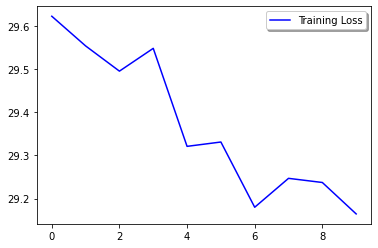

In [236]:
plt.plot(history_mlp.history['loss'],color='b',label='Training Loss')
plt.legend(loc='best',shadow=True)

In [247]:
model_cnn=tf.keras.Sequential()
model_cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(150,activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse',optimizer=adam)
model_cnn.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 32, 64)            192       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               153750    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 151       
Total params: 154,093
Trainable params: 154,093
Non-trainable params: 0
_________________________________________________________________


In [249]:
X_train.shape

(214200, 33, 1)

In [248]:
cnn_history=model_cnn.fit(X_train,y_train,epochs=10,verbose=2)

Epoch 1/10
214200/214200 - 40s - loss: 27.7921
Epoch 2/10
214200/214200 - 38s - loss: 26.2117
Epoch 3/10
214200/214200 - 39s - loss: 28.3454
Epoch 4/10
214200/214200 - 38s - loss: 75.7251
Epoch 5/10
214200/214200 - 39s - loss: 24.0543
Epoch 6/10
214200/214200 - 37s - loss: 28.9863
Epoch 7/10
214200/214200 - 39s - loss: 28.0946
Epoch 8/10
214200/214200 - 38s - loss: 24.2545
Epoch 9/10
214200/214200 - 38s - loss: 31.3588
Epoch 10/10
214200/214200 - 37s - loss: 26.5145


In [244]:
submission_pfs=model_cnn.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('final_submission1.csv',index=False)

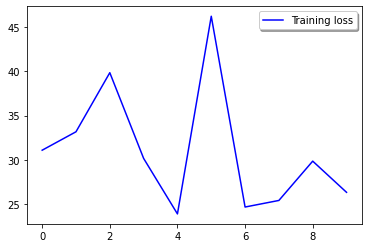

In [239]:
plt.plot(cnn_history.history['loss'],color='b',label='Training loss')
plt.legend(loc='best',shadow='True')


In [242]:
subsequences=3
timesteps=
X_train_series_sub=X_train.reshape((X_train.shape[0],subsequences,timesteps,1))
print('Train set shape',X_train_series_sub.shape)

Train set shape (214200, 3, 11, 1)


In [243]:
X_train.shape

(214200, 33, 1)